# 机器学习预测mvp

In [1]:
import numpy as np
import pandas as pd

In [2]:
stats = pd.read_csv("player_mvp_stats.csv",index_col=0)
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,—,110.7,103.9,6.74
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,0.470,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,—,110.7,103.9,6.74
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,0.548,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,—,110.7,103.9,6.74
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,0.500,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,—,110.7,103.9,6.74
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,0.470,...,0.0,0.0,Los Angeles Lakers,63,19,0.768,—,110.7,103.9,6.74


## 1.预处理

### 1.指定预测年份

In [3]:
pred_year = 2019

### 2.填补缺失值

In [4]:
stats["GB"] = stats["GB"].str.replace("—","0")
stats["GB"] = pd.to_numeric(stats["GB"])

In [5]:
stats["GB"].dtype

dtype('float64')

In [6]:
stats = stats.apply(pd.to_numeric, errors='ignore')

In [7]:
stats = stats.fillna(0)

### 3.选择predictor

In [8]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [9]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA'
              , '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%'
              , 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS','Pos']

#### 1.创建哑变量

In [10]:
pd.get_dummies(stats['Pos'],prefix='Pos')

,Pos_C,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-C,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-PG-SF,Pos_SG-SF
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15072,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15073,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15074,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
dummy_pos = pd.get_dummies(stats['Pos'],prefix='Pos')
dummy_pos.columns

Index(['Pos_C', 'Pos_C-PF', 'Pos_PF', 'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG',
       'Pos_PG-SF', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C', 'Pos_SF-PF',
       'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG', 'Pos_SG-PG-SF',
       'Pos_SG-SF'],
      dtype='object')

In [12]:
predictors.remove("Pos")

In [13]:
predictors_and_dum = predictors + dummy_pos.columns.tolist()

In [14]:
predictors_and_dum

['Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'W',
 'L',
 'W/L%',
 'GB',
 'PS/G',
 'PA/G',
 'SRS',
 'Pos_C',
 'Pos_C-PF',
 'Pos_PF',
 'Pos_PF-C',
 'Pos_PF-SF',
 'Pos_PG',
 'Pos_PG-SF',
 'Pos_PG-SG',
 'Pos_SF',
 'Pos_SF-C',
 'Pos_SF-PF',
 'Pos_SF-SG',
 'Pos_SG',
 'Pos_SG-PF',
 'Pos_SG-PG',
 'Pos_SG-PG-SF',
 'Pos_SG-SF']

In [15]:
stats_and_dum = stats.join(dummy_pos)
stats_and_dum.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pos_PG-SG,Pos_SF,Pos_SF-C,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-PG-SF,Pos_SG-SF
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0,0,0,0,0,0,0,0,0,0
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,0.470,...,0,0,0,0,0,1,0,0,0,0
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,0.548,...,0,1,0,0,0,0,0,0,0,0
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,0.500,...,0,0,0,0,0,0,0,0,0,0
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,0.470,...,0,1,0,0,0,0,0,0,0,0


#### 2.加入ratio变量

In [16]:
stats_and_dum[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stats_and_dum.groupby("Year")[["PTS", "AST", "STL", "BLK", "3P"]].apply(lambda x: x/x.mean())

In [17]:
new_predictor = ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]
predictors_and_dum += new_predictor

#### 3.划分 train/test

In [18]:
train = stats_and_dum[~(stats_and_dum["Year"] == pred_year)]
test = stats_and_dum[stats_and_dum["Year"] == pred_year]

In [19]:
train.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-PG-SF,Pos_SG-SF,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0,0,0,0,0,1.446394,0.524403,1.101744,1.430189,1.129657
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,0.470,...,1,0,0,0,0,1.737915,1.716226,1.377180,0.953459,6.777943
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,0.548,...,0,0,0,0,0,2.365807,1.716226,1.652616,1.430189,1.129657
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,0.500,...,0,0,0,0,0,0.168185,0.095346,0.413154,1.191824,0.000000
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,0.470,...,0,0,0,0,0,0.583042,0.190692,0.550872,0.238365,0.000000


In [20]:
train_x = train[predictors_and_dum]
train_y = train["Share"]

test_x = test[predictors_and_dum]
test_y = test["Share"]

## 2.机器学习预测

In [21]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error

C:\Users\jyq\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 1.定义工具

In [22]:
## 展示预测结果
def show_pre_table(mvp_prediction):
    pd_mvp_pred = pd.DataFrame(mvp_prediction, columns=["predictions"], index=test_y.index)
    combinations = pd.concat([test[["Player","Share"]],pd_mvp_pred], axis=1)
    
    actual = combinations.sort_values("Share", ascending=False)
    predicted = combinations.sort_values("predictions", ascending=False)
    actual["Rk"] = list(range(1,actual.shape[0]+1))
    predicted["Predicted_Rk"] = list(range(1,predicted.shape[0]+1))

    pred_table = actual.merge(predicted, on="Player")
    
    #删除多余的列并修改列名
    del pred_table["Share_y"]
    del pred_table["predictions_y"]
    pred_table.rename(columns={'Share_x':'Share', 'predictions_x':'predictions'}, inplace=True)
    
    pred_table["Rk_diff"] = pred_table["Rk"] - pred_table["Predicted_Rk"]
    
    return pred_table   

In [23]:
'''
展示预测误差
1.不指定topn时，计算全部误差
2.指定topn时，计算前实际前十的误差
'''
def show_mse_error(pred_table,topn = 0):
    if topn == 0:
        mse = mean_squared_error(pred_table["Share"], pred_table["predictions"])
    else:
        topN = pred_table.iloc[:10,:]
        mse = mean_squared_error(topN["Share"], topN["predictions"])
        
    return mse

### 2.使用岭回归预测

In [24]:
reg = Ridge(alpha=0.1)
reg.fit(train_x, train_y)

Ridge(alpha=0.1)

In [25]:
mvp_pred_reg = reg.predict(test_x)

In [26]:
reg_tb = show_pre_table(mvp_pred_reg)
reg_tb.head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Rk_diff
0,Giannis Antetokounmpo,0.932,0.204789,1,1,0
1,James Harden,0.768,0.162068,2,3,-1
2,Paul George,0.352,0.096896,3,10,-7
3,Nikola Jokić,0.210,0.105253,4,9,-5
4,Stephen Curry,0.173,0.085987,5,13,-8
5,Damian Lillard,0.068,0.081624,6,17,-11
6,Joel Embiid,0.049,0.145034,7,4,3
7,Kevin Durant,0.025,0.122452,8,6,2
8,Kawhi Leonard,0.013,0.114413,9,8,1
9,Russell Westbrook,0.008,0.116862,10,7,3


In [27]:
reg_tb["Share"].value_counts()

0.000    518
0.001      2
0.932      1
0.768      1
0.352      1
0.210      1
0.173      1
0.068      1
0.049      1
0.025      1
0.013      1
0.008      1
Name: Share, dtype: int64

In [28]:
show_mse_error(reg_tb,10)

0.10206516412345334

### 3.使用随机森林预测

In [29]:
rf = RandomForestRegressor(n_estimators=300, random_state=1, min_samples_split=5)
rf.fit(train_x,train_y)

RandomForestRegressor(min_samples_split=5, n_estimators=300, random_state=1)

In [30]:
mvp_pred_rf = rf.predict(test_x)

In [31]:
rf_tb = show_pre_table(mvp_pred_rf)
rf_tb.head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Rk_diff
0,Giannis Antetokounmpo,0.932,0.528283,1,1,0
1,James Harden,0.768,0.523160,2,2,0
2,Paul George,0.352,0.101033,3,7,-4
3,Nikola Jokić,0.210,0.027341,4,13,-9
4,Stephen Curry,0.173,0.292178,5,4,1
5,Damian Lillard,0.068,0.072073,6,10,-4
6,Joel Embiid,0.049,0.351017,7,3,4
7,Kevin Durant,0.025,0.246741,8,6,2
8,Kawhi Leonard,0.013,0.264778,9,5,4
9,Russell Westbrook,0.008,0.081175,10,9,1


In [32]:
show_mse_error(rf_tb)

0.001051821341317017

#### 1.变量重要性

<AxesSubplot:>

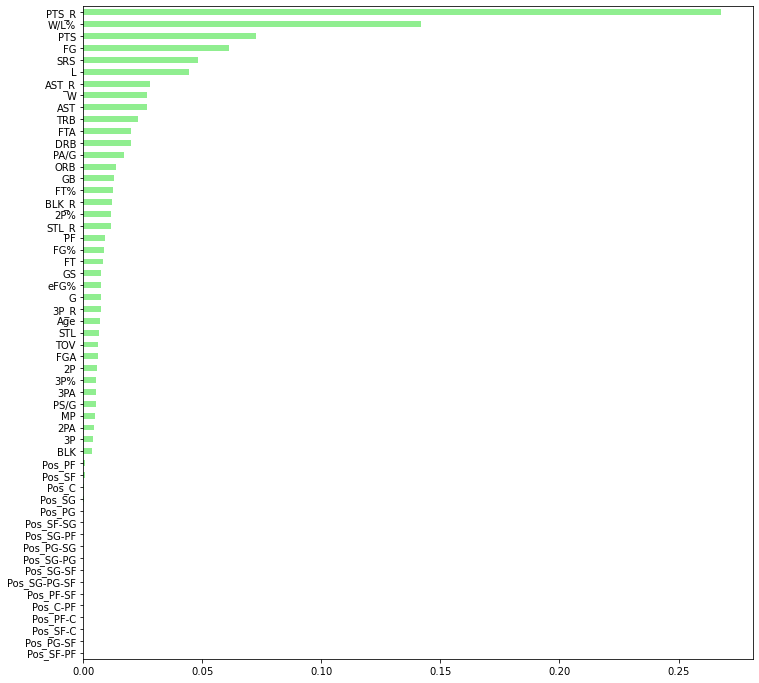

In [33]:
importance_rf = pd.Series(rf.feature_importances_, index=test_x.columns)
sorted_importance_rf = importance_rf.sort_values()

sorted_importance_rf.plot(kind="barh",color='lightgreen',figsize=([12,12]))

#### 2.GridCVSearch

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
rf_grid = RandomForestRegressor()

params_dt = {
    'max_depth': [3,4,5,6],
    'min_samples_leaf' : [0.04, 0.06, 0.08],
    'max_features' : [0.2, 0.4, 0.6, 0.8]
}

In [36]:
grid_dt = GridSearchCV(estimator=rf_grid,
                      param_grid=params_dt,
                      scoring="neg_mean_squared_error",
                      cv=5,
                      n_jobs=-1)

In [37]:
grid_dt.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error')

In [38]:
grid_dt.best_params_

{'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.04}

In [39]:
grid_rf_mvp =  grid_dt.predict(test_x)
grid_rf_tb = show_pre_table(grid_rf_mvp)
grid_rf_tb.head(20)

,Player,Share,predictions,Rk,Predicted_Rk,Rk_diff
0,Giannis Antetokounmpo,0.932,0.081361,1,3,-2
1,James Harden,0.768,0.080700,2,7,-5
2,Paul George,0.352,0.080563,3,10,-7
3,Nikola Jokić,0.210,0.063490,4,32,-28
4,Stephen Curry,0.173,0.070320,5,25,-20
5,Damian Lillard,0.068,0.080519,6,13,-7
6,Joel Embiid,0.049,0.081361,7,2,5
7,Kevin Durant,0.025,0.081361,8,1,7
8,Kawhi Leonard,0.013,0.080270,9,14,-5
9,Russell Westbrook,0.008,0.080680,10,9,1


In [40]:
show_mse_error(grid_rf_tb)

0.0027468409061428478

### 4.使用xgboost进行预测

#### 1.加入权重

In [41]:
reg_tb["Share"].value_counts()

0.000    518
0.001      2
0.932      1
0.768      1
0.352      1
0.210      1
0.173      1
0.068      1
0.049      1
0.025      1
0.013      1
0.008      1
Name: Share, dtype: int64

In [42]:
weight_train_x = train_y.apply(lambda x: 1.5 if (x!=0) else 1)
weight_train_x = np.array(weight_train_x)

#### 2.用sklearn接口预测

In [43]:
# 加权重效果不好，也可能权重要设置更优的值
# xgb_weight = XGBRegressor().fit(train_x, train_y,sample_weight = weight_train_x)
xgb_weight = XGBRegressor().fit(train_x, train_y)

C:\Users\jyq\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [44]:
xgb_pred = xgb_weight .predict(test_x)

In [45]:
xg_tb = show_pre_table(xgb_pred)
xg_tb.head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Rk_diff
0,Giannis Antetokounmpo,0.932,0.545981,1,2,-1
1,James Harden,0.768,0.628405,2,1,1
2,Paul George,0.352,0.120568,3,7,-4
3,Nikola Jokić,0.210,0.032669,4,11,-7
4,Stephen Curry,0.173,0.161978,5,6,-1
5,Damian Lillard,0.068,0.036581,6,10,-4
6,Joel Embiid,0.049,0.512238,7,3,4
7,Kevin Durant,0.025,0.325669,8,4,4
8,Kawhi Leonard,0.013,0.228292,9,5,4
9,Russell Westbrook,0.008,0.001787,10,26,-16


In [46]:
show_mse_error(xg_tb)

0.001160834476349289

#### 3.用C接口预测

In [47]:
dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x, test_y)

C:\Users\jyq\AppData\Roaming\Python\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [48]:
params = {
    'objective' : 'multi:softprob',  #类似于sigmod,可以将多分类的预测值映射到0到1之间，通过softmax函数解决多分类问题
    #'objective' : 'multi:softprob', #类似于predict_prob，给出每个样本在每个类别下下的预测概率
    'num_class' : 3,   # 必须告知字典，当前数据集里Y标签的种类有多少
    'eval_metric' : ['merror', 'mlogloss'],
    'eta' : 0.1,       # 学习率
    'max_depth' : 5,   # 树的最大深度
    'gamma' : 0,#后剪枝的过程,0到正无穷, 默认0，尝试0, 1，5，10，100
    'min_child_weight':1,#叶子节点权重分数的下界
}

In [49]:
watchlist = [(dtrain, 'train'),(dtest, 'test')]
model = xgb.train(params, dtrain, 1000, 
                  watchlist, 
                  early_stopping_rounds = 10,
                  verbose_eval = False
                 )

In [50]:
Y_train_pred = model.predict(dtrain)
Y_test_pred = model.predict(dtest)  # 由于设定的是softmax，所以给出的结果直接是label, 可以尝试改成softprob

In [51]:
Y_test_pred

array([[9.9863297e-01, 6.8148534e-04, 6.8550353e-04],
       [9.9999273e-01, 3.6141646e-06, 3.6396602e-06],
       [9.9966204e-01, 1.6836966e-04, 1.6955739e-04],
       ...,
       [9.9991035e-01, 4.4685585e-05, 4.5000852e-05],
       [9.9999130e-01, 4.3586233e-06, 4.3893701e-06],
       [9.9995172e-01, 2.4043142e-05, 2.4212772e-05]], dtype=float32)